#  영상 인식(image recognition)
    - 전처리
    - 특징 추출
    - 분류

## Convolution Neural Network(CNN)
- Conv2D(n, kernel_size, input_shape, activation)
- 하나의 이미지--> 특징만 추출하는 여러개의 마스킹된 이미지들을 만들어서 학습에 이용
- 이 전처리 과정을 DNN안에 넣어준다
- 컨볼루션, 서브 샘플링(pooling)을 여러번 반복 후 학습
    - 마스크, 커널 
    - 컨벌루션(Convolution), 합성곱 : 컨벌루젼 과정으로 특징만 추출
    - 서브 샘플링, Pooling : 컨벌루션 과정으로 생성된 데이터의 크기를 줄임(특징만 뽑아서 크기를 줄인다)
        - max pooling
        - average pooling
    - Stride : 마스크가 옆으로 얼마나 이동하는지 
- 드롭아웃(drop out): 은닉충에 배치된 노드 중 일부만 이용해서 계산한 값을 업데이트, 과적합을 효율적으로 피하는 방법
- Flatten() : 1차원으로 배열을 바꿔준다
- padding: 가장자리의 특징을 살리는 방법, 주변을 0으로 둘러싸여준다

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D, Flatten
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [5]:
seed =0
np.random.seed(seed)
tf.random.set_seed(3)

## 전처리
(X_train,Y_train),(X_test,Y_test)= mnist.load_data()
X_train= X_train.reshape(X_train.shape[0], 28,28,1).astype('float64')/255
X_test= X_test.reshape(X_test.shape[0], 28,28,1).astype('float64')/255
Y_train= tf.keras.utils.to_categorical(Y_train)
Y_test= tf.keras.utils.to_categorical(Y_test)

## 모델
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
###
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

## 모델 실행 환경
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 모델 저장, 모델 최적화 단계에서 early stop

MODEL_DIR= './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                             verbose=1,save_best_only=True)
early_stopping_callback =EarlyStopping(monitor='val_loss',patience=10)

In [6]:
history= model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=200,verbose=0,
                   callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.05672, saving model to ./model\01-0.0567.hdf5

Epoch 2: val_loss improved from 0.05672 to 0.04297, saving model to ./model\02-0.0430.hdf5

Epoch 3: val_loss improved from 0.04297 to 0.03767, saving model to ./model\03-0.0377.hdf5

Epoch 4: val_loss improved from 0.03767 to 0.03446, saving model to ./model\04-0.0345.hdf5

Epoch 5: val_loss improved from 0.03446 to 0.03278, saving model to ./model\05-0.0328.hdf5

Epoch 6: val_loss improved from 0.03278 to 0.02829, saving model to ./model\06-0.0283.hdf5

Epoch 7: val_loss improved from 0.02829 to 0.02588, saving model to ./model\07-0.0259.hdf5

Epoch 8: val_loss did not improve from 0.02588

Epoch 9: val_loss did not improve from 0.02588

Epoch 10: val_loss did not improve from 0.02588

Epoch 11: val_loss did not improve from 0.02588

Epoch 12: val_loss did not improve from 0.02588

Epoch 13: val_loss improved from 0.02588 to 0.02400, saving model to ./model\13-0.0240.hdf5

Epoch 14: val_loss did 

313/313 [==============================] - 2s 6ms/step - loss: 0.0292 - accuracy: 0.9922

 Test Accuracy: 0.9922


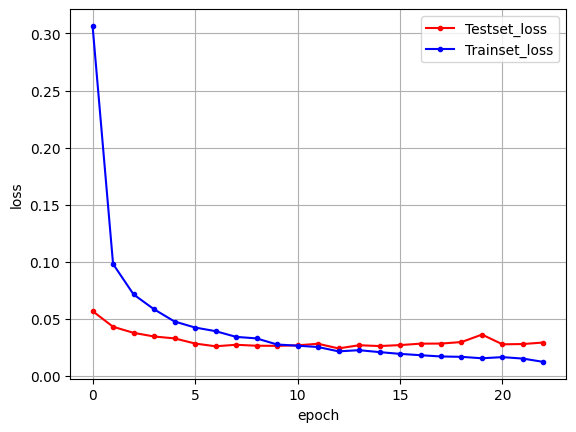

In [7]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test,Y_test)[1]))

# 테스트셋 오차
y_vloss= history.history['val_loss']

# 트레인셋 오차
y_loss= history.history['loss']

# 그래프
X_len=np.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker='.', c='red', label= 'Testset_loss')
plt.plot(X_len, y_loss, marker='.', c='blue', label= 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4917 - accuracy: 0.8271
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3757 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3359 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3139 - accuracy: 0.8850
Epoch 5/5
313/313 [==============================] - 0s 758us/step - loss: 0.3394 - accuracy: 0.8773
정확도: 0.8773000240325928


In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images / 255.0
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4867 - accuracy: 0.8183
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3193 - accuracy: 0.8820
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2740 - accuracy: 0.8981
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2474 - accuracy: 0.9080
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2587 - accuracy: 0.9067
정확도: 0.9067000150680542
